# Overfitting em Machine Learning:

## Modelo de Baixa Ordem (Grau Baixo):
Um modelo de regressão linear simples, com grau 1, ajusta uma reta aos dados.
Esse modelo pode não ser flexível o suficiente para capturar relações complexas nos dados, resultando em subajuste (underfitting).

## Modelo de Ordem Adequada (Grau Adequado):
Um modelo de grau adequado, que pode ser algo entre 2 e 5, por exemplo, pode ser mais flexível e capturar melhor relações não lineares nos dados.

## Modelo de Ordem Muito Alta (Grau Alto):
Quando o grau do polinômio é muito alto, o modelo se torna excessivamente flexível.
Ele pode se ajustar demais aos dados de treino, capturando até mesmo o ruído nos dados, em vez de apenas o padrão subjacente.
Como resultado, o modelo pode não generalizar bem para novos dados, levando a um desempenho inferior nos dados de teste (overfitting).

Erro médio quadrático no conjunto de treino: 0.69
Erro médio quadrático no conjunto de teste: 0.82


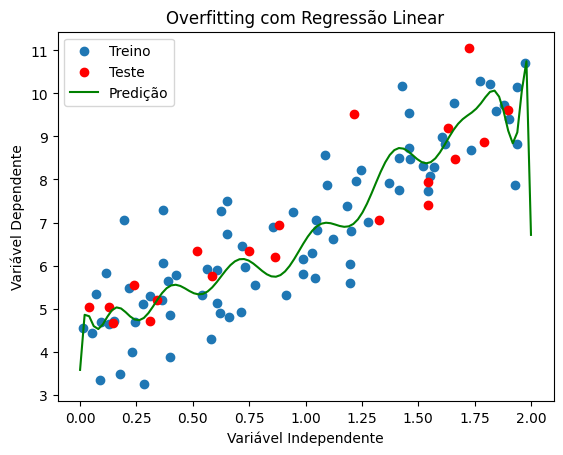

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Gerar dados
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Adicionar recursos polinomiais para induzir overfitting
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Treinar modelo de regressão linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Fazer predições nos conjuntos de treino e teste
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Calcular erro médio quadrático nos conjuntos de treino e teste
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Imprimir os erros
print(f'Erro médio quadrático no conjunto de treino: {mse_train:.2f}')
print(f'Erro médio quadrático no conjunto de teste: {mse_test:.2f}')

# Plotar dados de treino
plt.scatter(X_train[:, 0], y_train, label='Treino')

# Plotar dados de teste
plt.scatter(X_test[:, 0], y_test, label='Teste', color='red')

# Plotar predição do modelo nos dados de treino
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_pred = lin_reg.predict(X_range_poly)
plt.plot(X_range, y_range_pred, label='Predição', color='green')

plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Overfitting com Regressão Linear')
plt.legend()
plt.show()

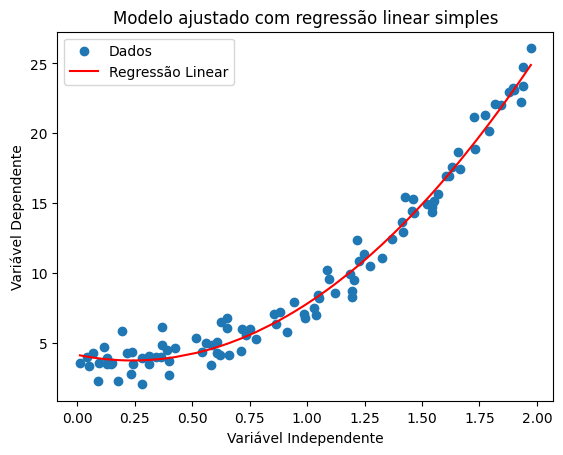

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Gerar dados não-lineares mais complexos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 + 1.5 * X + 2 * X**2 + 1.5 * X**3 + np.random.randn(100, 1)

# Adicionar features polinomiais (grafo cúbico)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Ajustar um modelo de regressão linear simples
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Fazer predições
y_pred = lin_reg.predict(X_poly)

# Ordenar os dados para melhor visualização do gráfico
order = np.argsort(X.flatten())

# Plotar dados e predição
plt.scatter(X, y, label='Dados')
plt.plot(X[order], y_pred[order], color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Modelo ajustado com regressão linear simples')
plt.legend()
plt.show()

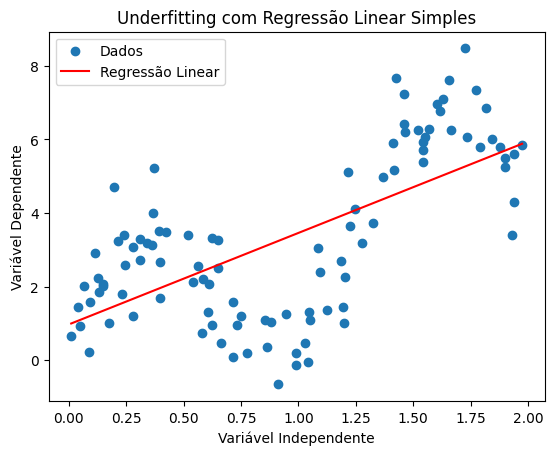

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerar dados não-lineares mais complexos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 2 * np.sin(5 * X) + np.random.randn(100, 1)

# Ajustar um modelo de regressão linear simples
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fazer predições
y_pred = lin_reg.predict(X)

# Ordenar os dados para melhor visualização do gráfico
order = np.argsort(X.flatten())

# Plotar dados e predição
plt.scatter(X, y, label='Dados')
plt.plot(X[order], y_pred[order], color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Underfitting com Regressão Linear Simples')
plt.legend()
plt.show()

# Overfitting em Deep learning:

Neste exemplo, criaremos um modelo simples com duas camadas ocultas contendo 150 neurônios cada. O modelo é treinado por 10000 épocas usando dados de treinamento gerados sinteticamente. Observe que o modelo tem capacidade suficiente para se ajustar aos dados de treinamento, mas isso resulta em um overfitting, como evidenciado pela diferença entre a função real e a curva aprendida pelo modelo quando aplicada a dados de teste.

Epoch [0/10000], Loss: 4.3465
Epoch [1500/10000], Loss: 0.0305
Epoch [3000/10000], Loss: 0.0303
Epoch [4500/10000], Loss: 0.0295
Epoch [6000/10000], Loss: 0.0276
Epoch [7500/10000], Loss: 0.0263
Epoch [9000/10000], Loss: 0.0256


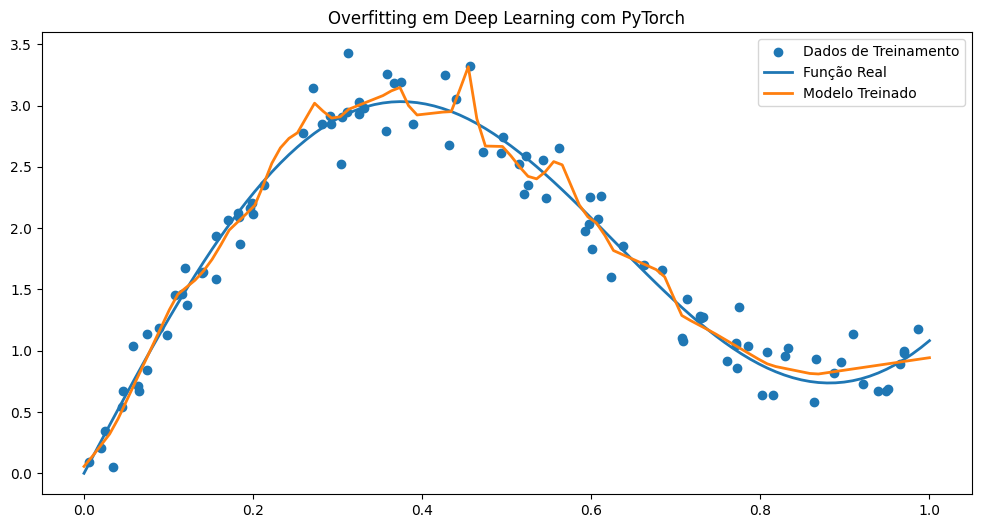

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados sintéticos
np.random.seed(42)
torch.manual_seed(42)

# Função alvo (verdadeira relação entre entrada e saída)
def true_function(x):
    return 3 * x + 2 * np.sin(5 * x)

# Gerar dados de treinamento
num_samples = 100
train_x = np.sort(np.random.rand(num_samples))
train_y = true_function(train_x) + 0.2 * np.random.randn(num_samples)

# Gerar dados de teste
test_x = np.linspace(0, 1, 100)
test_y = true_function(test_x)

# Converter para tensores
train_x_tensor = torch.tensor(train_x, dtype=torch.float32).view(-1, 1)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32).view(-1, 1)
test_x_tensor = torch.tensor(test_x, dtype=torch.float32).view(-1, 1)
test_y_tensor = torch.tensor(test_y, dtype=torch.float32).view(-1, 1)

# Definir modelo simples com muitos parâmetros
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 150)
        self.fc2 = nn.Linear(150, 150)  # Adicionar uma camada oculta extra
        self.fc3 = nn.Linear(150, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instanciar o modelo
model = Model()

# Definir função de perda e otimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinamento do modelo
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_x_tensor)
    loss = criterion(outputs, train_y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 1500 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

# Avaliação do modelo
model.eval()
with torch.no_grad():
    train_outputs = model(train_x_tensor)
    test_outputs = model(test_x_tensor)

# Plotagem dos resultados
plt.figure(figsize=(12, 6))

plt.scatter(train_x, train_y, label='Dados de Treinamento')
plt.plot(test_x, test_y, label='Função Real', linewidth=2)
plt.plot(test_x, test_outputs.numpy(), label='Modelo Treinado', linewidth=2)

plt.title('Overfitting em Deep Learning com PyTorch')
plt.legend()
plt.show()

# Underfitting com Deep Learning:

Neste exemplo, adicionamos uma camada oculta com 10 neurônios, mas o modelo ainda não é suficientemente complexo para capturar a relação entre as entradas e as saídas.

Epoch [0/1000], Loss: 4.5147
Epoch [100/1000], Loss: 0.8502
Epoch [200/1000], Loss: 0.8013
Epoch [300/1000], Loss: 0.7690
Epoch [400/1000], Loss: 0.7446
Epoch [500/1000], Loss: 0.7252
Epoch [600/1000], Loss: 0.7065
Epoch [700/1000], Loss: 0.6872
Epoch [800/1000], Loss: 0.6668
Epoch [900/1000], Loss: 0.6450


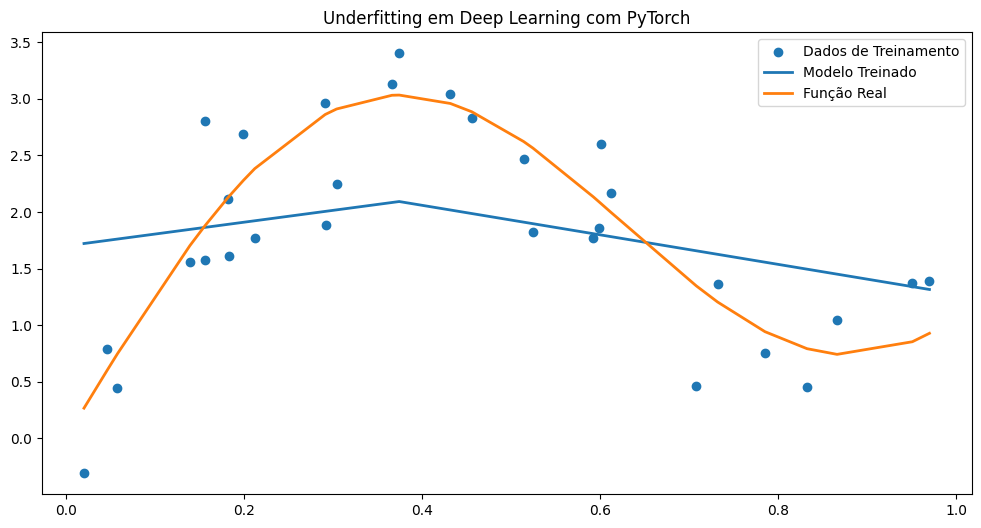

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados sintéticos
np.random.seed(42)
torch.manual_seed(42)

# Função alvo (verdadeira relação entre entrada e saída)
def true_function(x):
    return 3 * x + 2 * np.sin(5 * x)

# Gerar dados de treinamento
num_samples = 30
train_x = np.sort(np.random.rand(num_samples))
train_y = true_function(train_x) + 0.5 * np.random.randn(num_samples)  # Aumentar a variabilidade do ruído

# Converter para tensores
train_x_tensor = torch.tensor(train_x, dtype=torch.float32).view(-1, 1)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32).view(-1, 1)

# Definir modelo com underfitting
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # Camada oculta com 10 neurônios
        self.fc2 = nn.Linear(10, 1)  # Camada de saída

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instanciar o modelo
model = Model()

# Definir função de perda e otimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Treinamento do modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_x_tensor)
    loss = criterion(outputs, train_y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

# Avaliação do modelo
model.eval()
with torch.no_grad():
    train_outputs = model(train_x_tensor)

# Plotagem dos resultados
plt.figure(figsize=(12, 6))

plt.scatter(train_x, train_y, label='Dados de Treinamento')
plt.plot(train_x, train_outputs.numpy(), label='Modelo Treinado', linewidth=2)
plt.plot(train_x, true_function(train_x), label='Função Real', linewidth=2)

plt.title('Underfitting em Deep Learning com PyTorch')
plt.legend()
plt.show()
